<a href="https://colab.research.google.com/github/KimSongLy/kimsong_workspace/blob/main/Detection/Age_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2
from google.colab.patches import cv2_imshow
import dlib
import numpy as np

In [13]:
img = cv2.imread('detection_data/assets/kid1.jpg')
img = cv2.resize(img, (720, 640))
frame = img.copy()

In [16]:
# ------------ Model for Age detection --------#
age_weights = "detection_data/Models/age_deploy.prototxt"
age_config = "detection_data/Models/age_net.caffemodel"
age_Net = cv2.dnn.readNet(age_config, age_weights)

In [17]:
# Model requirements for image
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
           '(25-32)', '(38-43)', '(48-53)', '(60-100)']
model_mean = (78.4263377603, 87.7689143744, 114.895847746)

In [19]:
# storing the image dimensions
fH = img.shape[0]
fW = img.shape[1]

Boxes = []  # to store the face co-ordinates
mssg = 'Face Detected'  # to display on image

In [20]:
# ------------- Model for face detection---------#
face_detector = dlib.get_frontal_face_detector()
# converting to grayscale
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [21]:
# -------------detecting the faces--------------#
faces = face_detector(img_gray)

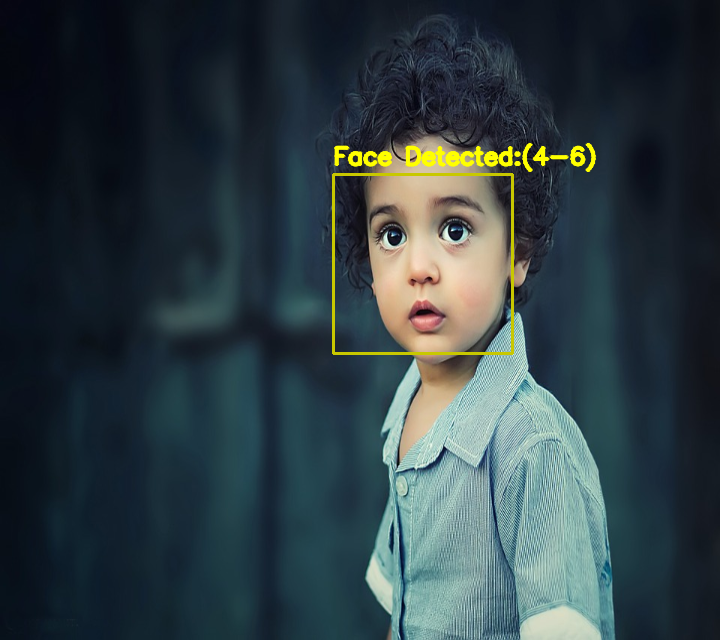

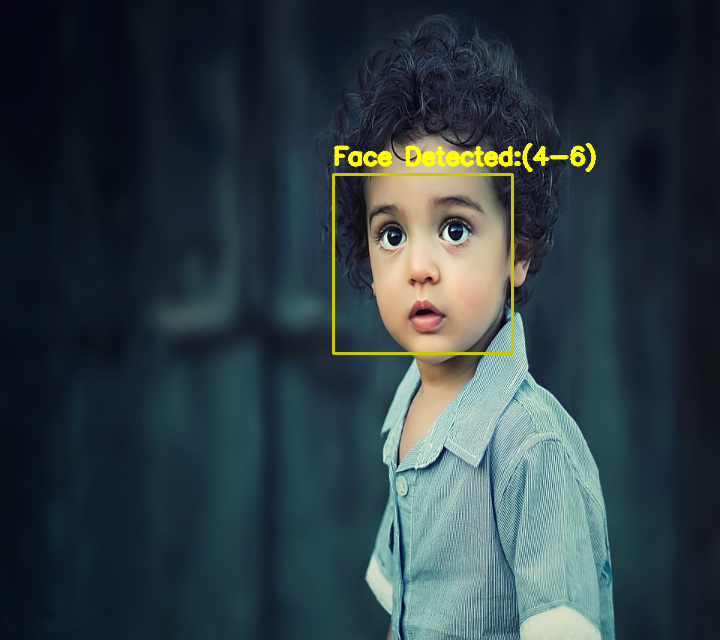

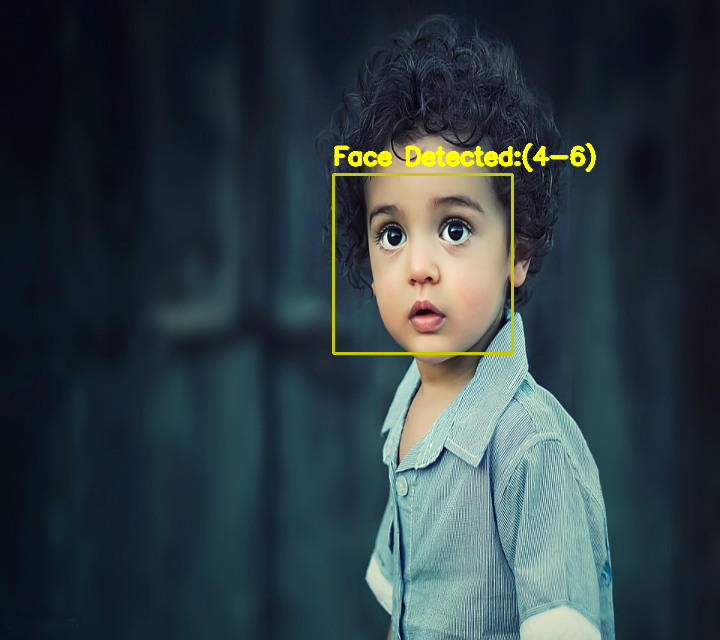

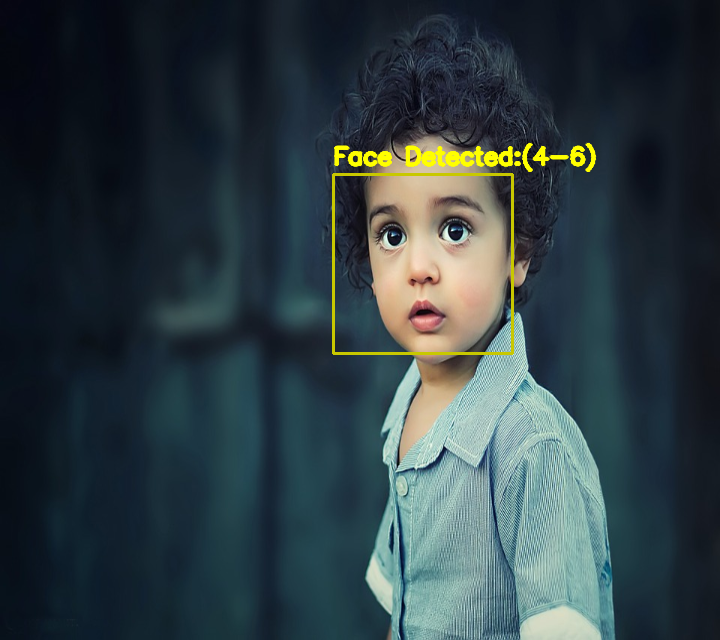

In [27]:
# If no faces our detected
if not faces:
    mssg = 'No face detected'
    cv2.putText(img, f'{mssg}', (40, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2)
    cv2.imshow('Age detected', img)
    cv2.waitKey(0)
  
else:
    # --------- Bounding Face ---------#
    for face in faces:
        x = face.left()  # extracting the face coordinates
        y = face.top()
        x2 = face.right()
        y2 = face.bottom()
  
        # rescaling those coordinates for our image
        box = [x, y, x2, y2]
        Boxes.append(box)
        cv2.rectangle(frame, (x, y), (x2, y2), 
                      (00, 200, 200), 2)
  
    for box in Boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]
  
        # ----- Image preprocessing --------#
        blob = cv2.dnn.blobFromImage(
            face, 1.0, (227, 227), model_mean, swapRB=False)
  
        # -------Age Prediction---------#
        age_Net.setInput(blob)
        age_preds = age_Net.forward()
        age = ageList[age_preds[0].argmax()]
  
        cv2.putText(frame, f'{mssg}:{age}', (box[0],
                                             box[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                    (0, 255, 255), 2, cv2.LINE_AA)
  
        cv2_imshow(frame)
        cv2.waitKey(0)